# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [9]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('Data/insurance2.csv')

In [10]:
medical.shape
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [11]:
null_columns=medical.columns[medical.isnull().any()]
medical[null_columns].isnull().sum()
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

Mean is --->  13270.422265141257
Std. Deviation is --->  12110.011236693994


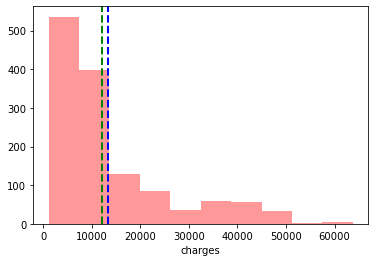

In [12]:
import seaborn as sns

# Make default histogram of sepal length
sns.distplot( medical.charges, bins=10,kde=False,color='red' )

#medical.hist(column='charges', bins=10, density=True)
mean = medical.charges.mean()
std = medical.charges.std()
print ('Mean is ---> ',mean)
print ('Std. Deviation is ---> ',std)
plt.axvline(mean, color='b', linestyle='dashed', linewidth=2)
plt.axvline(std, color='g', linestyle='dashed', linewidth=2)

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ <font color='blue'>To justify, Central Limit theorem should be used assuming that the sample is normally distributed. 
   Then perform a t-test and compare p-values to reject or accept the null hypothesis.</font>

In [13]:
samp_mean = medical.charges.mean()
samp_std  = medical.charges.std()

print('Sample Mean = ',samp_mean,', Sample Std  = ',samp_std)



Sample Mean =  13270.422265141257 , Sample Std  =  12110.011236693994


In [14]:
#samp_mean=13270.422265141257, μ=13270.4222 (Population Mean), σ=12110.0112 (Population Std.Dev), n = sample size
#z_score = (x-μ)/(σ/√n)
z_score = (13270.4222 - 12000)/12110
z_score

0.10490687035507852

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__ <font color='blue'> One-Sided confidence Interval should be used in this case.</font>

In [15]:
#Drawaing a random sample
sample = medical['charges']

mean = np.mean(sample)
std = np.std(sample)
alev = (1 - .95)/2
tlec = 2.3124
step5= std/np.sqrt(50)
step6 = tlec*step5
lower = mean-step6
upper = mean+step6
print('Confidence Interval: Lower -->', lower,'Upper -->', upper)

Confidence Interval: Lower --> 9311.653349007263 Upper --> 17229.191181275248


<font color='blue'>Since the Mean (13270.422265141257) is well within the above Confidence Interval there is no reason for concern for the Administrator.</font>

### Calculate z-score for the charges

In [16]:
# stats.norm.cdf(z_score)
df.head(2)

NameError: name 'df' is not defined

In [ ]:
# x=15748.114472, μ=13270.4222 (Population Mean), σ=12110.0112 (Population Std.Dev), n = sample size
#z_score = (x-μ)/(σ/√n)
z_score = (13270.4222 - 12000)/12110
z_score

In [ ]:
stats.norm.cdf(z_score)

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__ <font color='blue'>Variances for the two groups are equal</font>

### Null Hypothesis: People With Insurance are charged higher

In [19]:
df_yes=pd.DataFrame(medical[medical.insuranceclaim==1].charges) # Charges for People with Insurance
df_no=pd.DataFrame(medical[medical.insuranceclaim==0].charges)  # Charges for People with No Insurance
#Drawaing a random sample of size 10
y_samp = pd.DataFrame(df_yes['charges'].sample(n=10, random_state=1)) #People with Insurance
n_samp = pd.DataFrame(df_no['charges'].sample(n=10, random_state=1)) #People with No Insurance
n0=10
n1=10
x0 = n_samp.mean()
x1 = y_samp.mean()
s0 = n_samp.std()
s1 = y_samp.std()

In [20]:
sp=((((n0-1)*s0**2)+((n1-1)*s1**2))/(n0+n1-2))**(1/2)

In [21]:
t = (x0-x1)/(sp*((1/n0)+(1/n1))**(1/2))
print ('Calculated T statistic is: ',abs(t))

Calculated T statistic is:  charges    1.010287
dtype: float64


__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [ ]:
#Manually Calculated T-statistic value = 1.010287
#Degree of Freedom =(n0+n1-2)=18
#P-value for 18 DF (for a Two-tailed test) = .326

#### Our null hypothesis in this case is that there is no statistically significant difference in the mean between charges for people with insurance and chanrges for People with no isurance

In [22]:
stats.ttest_ind(y_samp, n_samp)

Ttest_indResult(statistic=array([1.01028717]), pvalue=array([0.32574658]))

The p-value in this case is .326 , which again above the standard thresholds of 0.05 or 0.01, so we CANNOT reject the null hypothesis.
Conclusion: we can say,statistically there is no significant difference between the amount charged for Patient with Insurance and amount charged for Patients with No Insurance.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__

In [23]:
#Calculating the T-statistic assuming Unequal Variance
t, p = stats.ttest_ind(y_samp, n_samp,equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))


ttest_ind:            t = 1.01029  p = 0.329544


__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ z-test.  There seems to be no z-test functions within scipy.stats

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test